In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Programming for Physics
<hr style="height: 2px; border-width: 0; color: gray; background-color: gray;" />

   &emsp;&emsp;&emsp;&emsp; __Lecture 24:__ simple rule & complex phenomena & why?
   

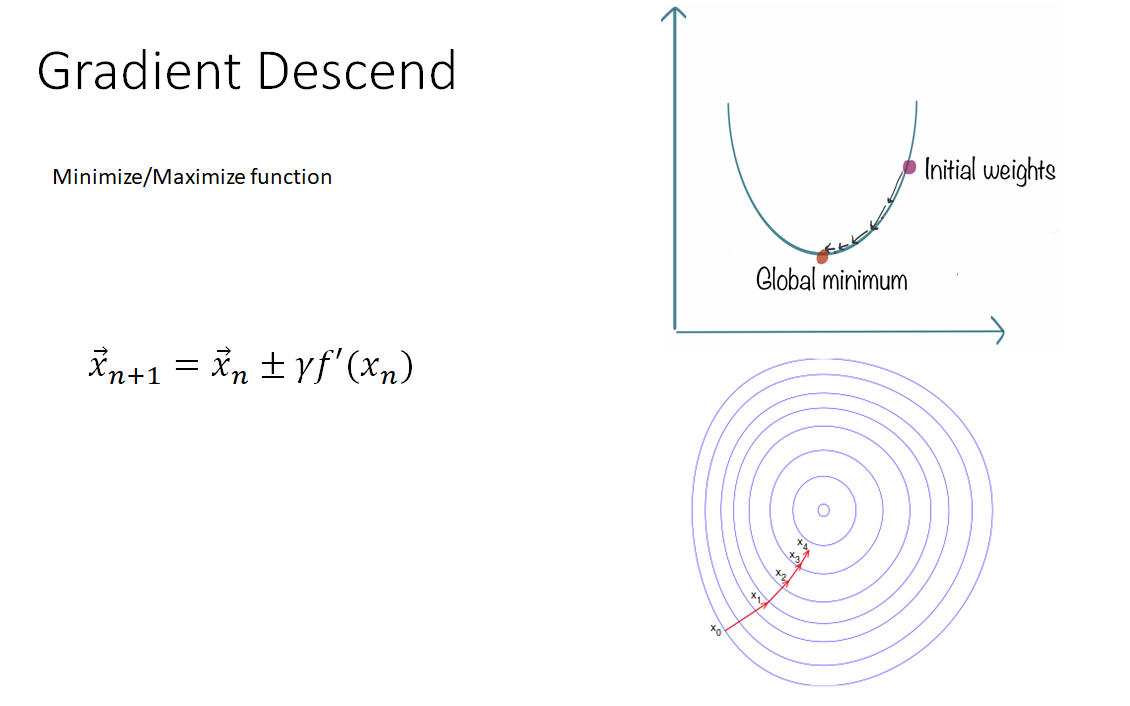

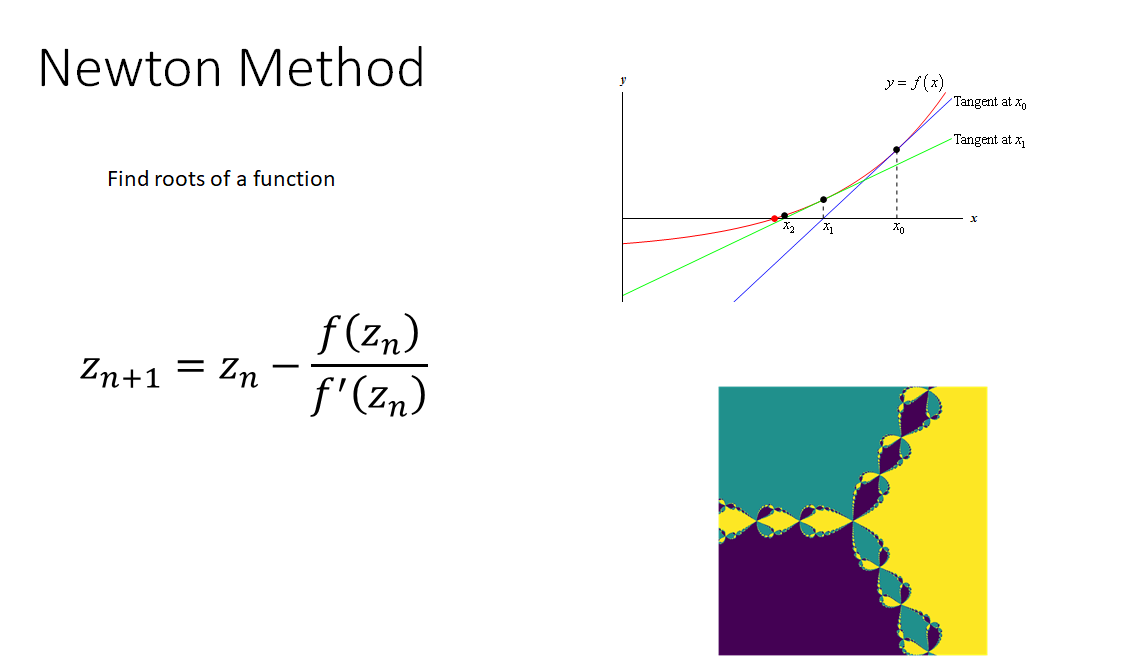

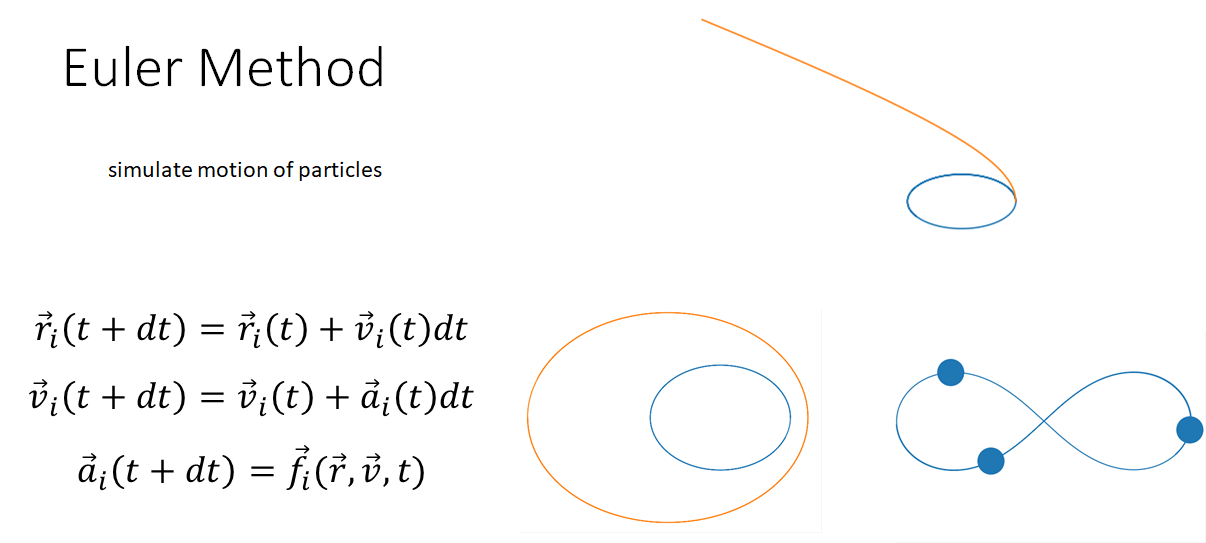

# Some other examples

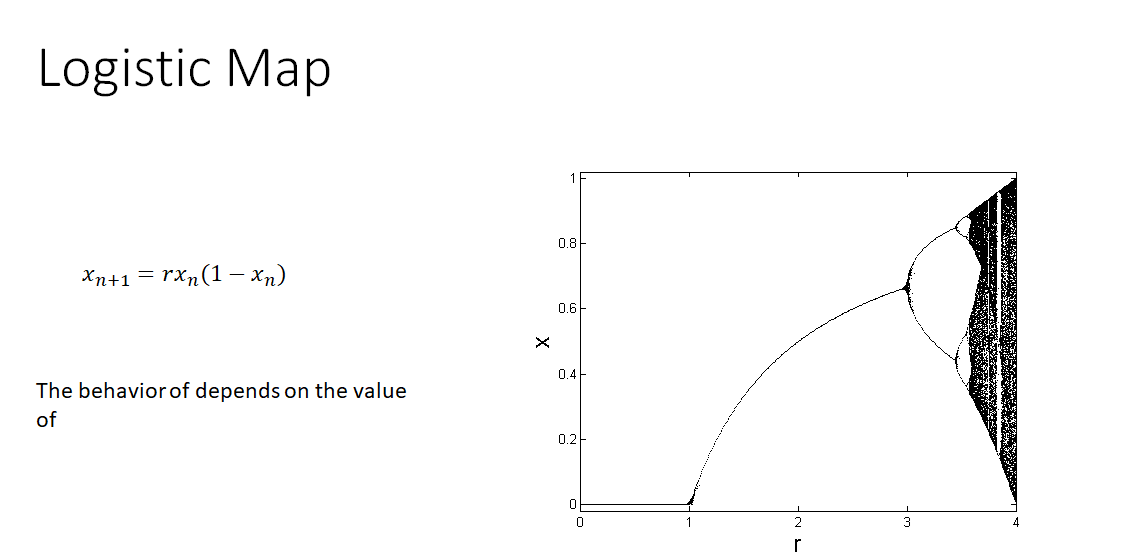

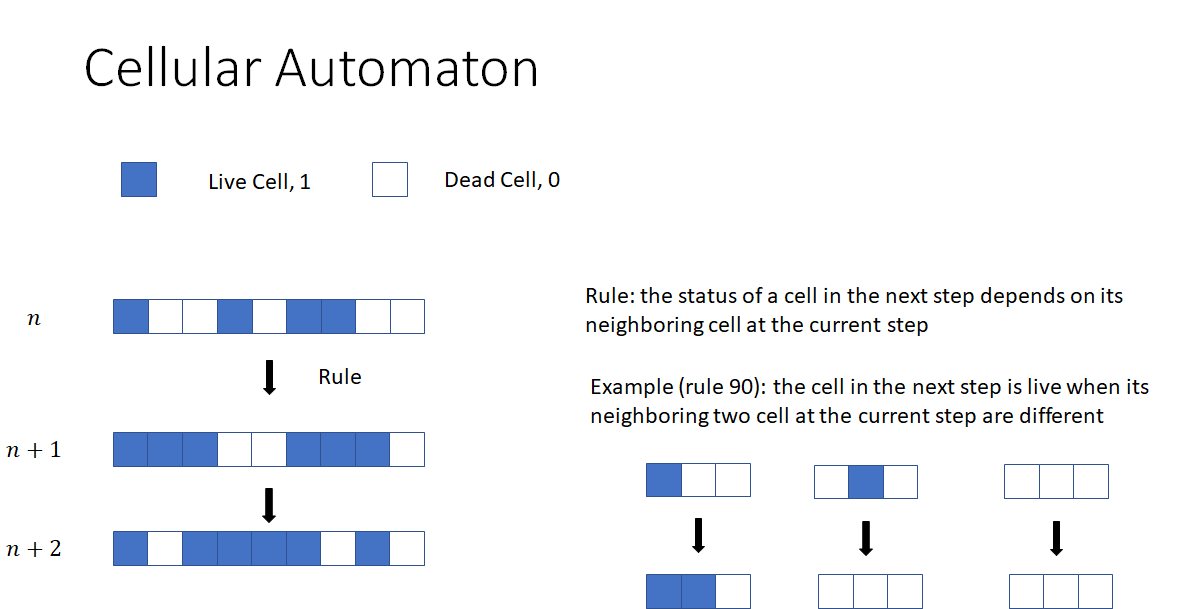

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def rule90(init_array, num_step):
    num_cell = len(init_array)
    m = np.zeros((num_step,num_cell)) # a zero matrix num_step*num_cell
    m[0,:]=init_array # record the inital array
    
    for i in range(1, num_step):
        for i_cell in range(1,num_cell-1): #go through cell_1...cell_n-1
            if m[i-1,i_cell-1] == m[i-1,i_cell+1]:
                m[i,i_cell]=0
            else:
                m[i,i_cell]=1
    return m
    

In [4]:
init_array = np.zeros(1000)
init_array[200]=1 # inital condition
init_array[800]=1
num_step =500

m = rule90(init_array, num_step)

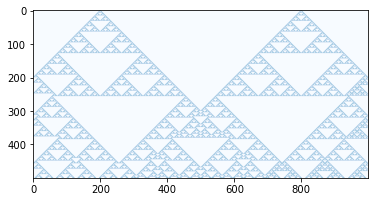

In [5]:
plt.imshow(m, cmap='Blues')

__Sierpiński triangle__

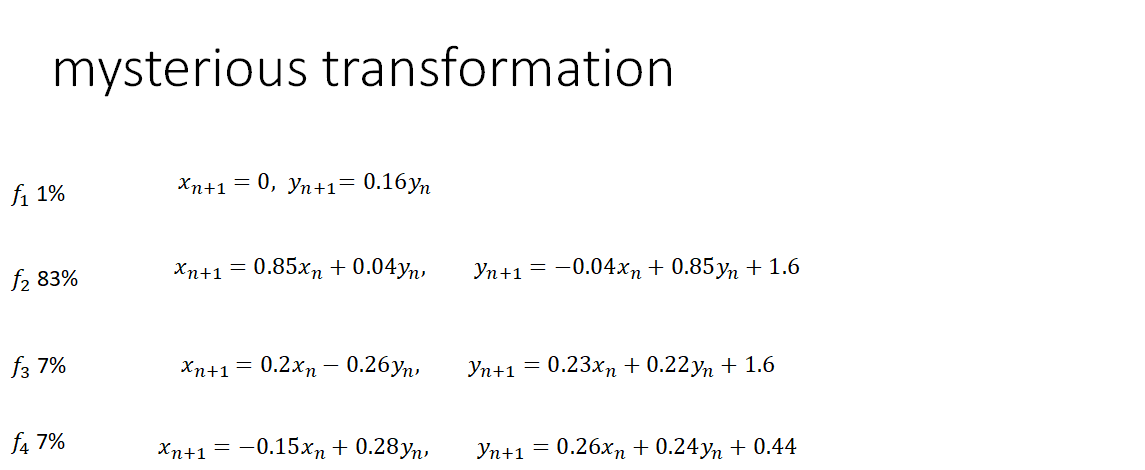

In [6]:
np.random.rand()

0.30953347172013146

In [7]:
def f(x,y,n):
    if n==1:
        x_new=0
        y_new=0.16*y
    if n==2:
        x_new=0.85*x+0.04*y
        y_new=-0.04*x + 0.85*y + 1.6
    if n==3:
        x_new=0.2*x - 0.26*y
        y_new=0.23*x + 0.22*y +1.6
    if n==4:
        x_new=-0.15*x + 0.28*y
        y_new=0.26*x + 0.24*y + 0.44
    return x_new, y_new

In [8]:
x=0
y=0
x_list=[x]
y_list=[y]

for i_step in range(1000000):
    rd = np.random.rand()
    if rd<0.01:
        x,y=f(x,y,1)
    elif rd<0.83+0.01:
        x,y=f(x,y,2)
    elif rd<0.83+0.01+0.08:
        x,y=f(x,y,3)
    else:
        x,y=f(x,y,4)
    
    x_list.append(x)
    y_list.append(y)
    

(-2.423649059912465,
 2.897553298941772,
 -0.4999112243960423,
 10.498135712316888)

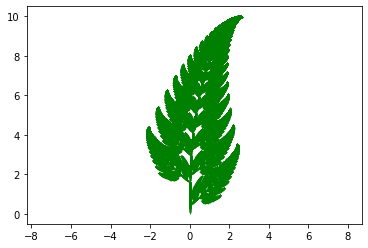

In [9]:
plt.plot(x_list,y_list,'.g',markersize=0.1)
plt.axis('equal')

(-2.423649059912465,
 2.897553298941772,
 -0.4999112243960423,
 10.498135712316888)

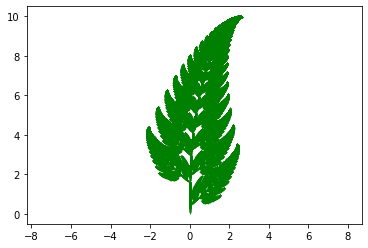

In [10]:
plt.plot(x_list,y_list,'.g',markersize=0.1)
plt.axis('equal')

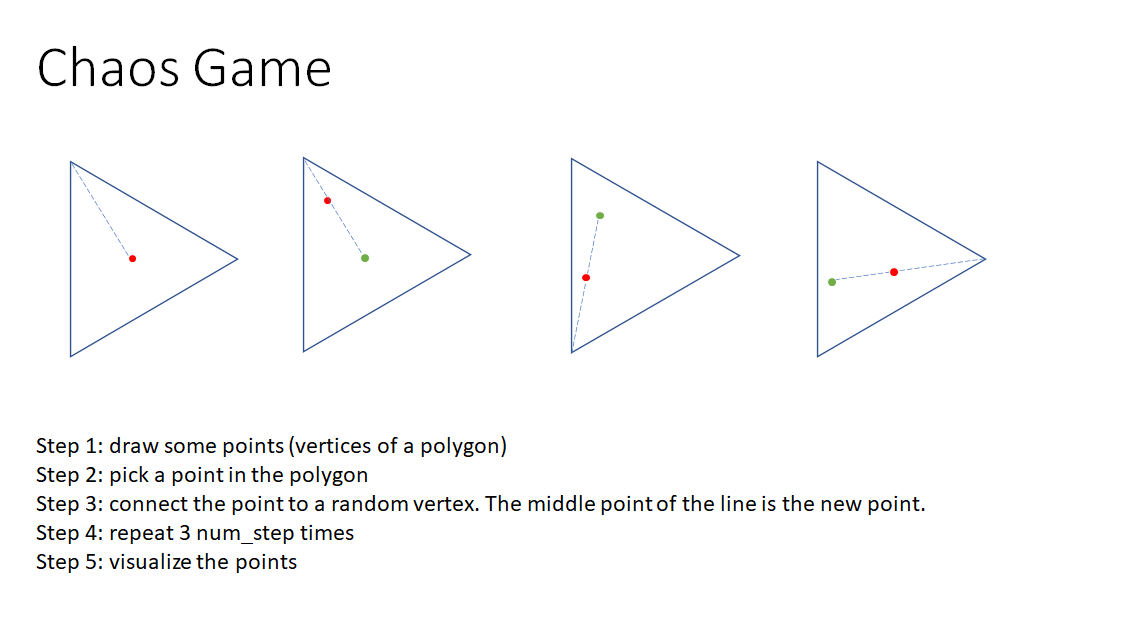

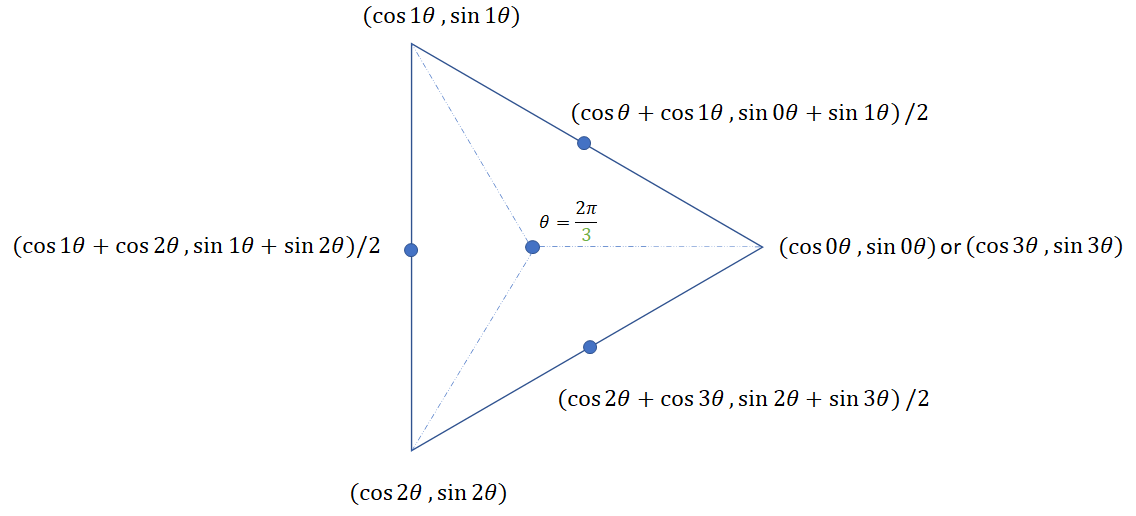

In [11]:
np.random.randint(3)

1

In [12]:
def chaos_game_simple(num_step):
    v1=np.array([1,0])
    v2=np.array([-0.5,3**0.5/2])
    v3=np.array([-0.5,-3**0.5/2])
    r=np.array([0,0])
    x_list=[0]
    y_list=[0]
    
    for i_step in range(num_step):
        rd=np.random.randint(3)
        if rd==0:
            r = (r+v1)/2
        if rd==1:
            r = (r+v2)/2
        if rd==2:
            r = (r+v3)/2
        x_list.append(r[0])
        y_list.append(r[1])
    return x_list, y_list
        
    
    

(-0.5747937244599481,
 1.0706790434836502,
 -0.9491987416925123,
 0.9517676553257605)

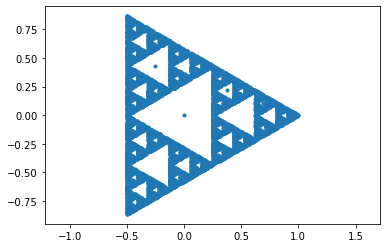

In [13]:
x_list,y_list = chaos_game_simple(10000)
plt.plot(x_list,y_list,'.')
plt.axis('equal')

In [14]:
def chaos_game(n_poly, p, num_step):
    theta=2*np.pi/n_poly
    angle=np.array(range(n_poly))*theta #angle for each vertex
    vertex=np.zeros((n_poly,2))
    vertex[:,0]=np.cos(angle)
    vertex[:,1]=np.sin(angle)
    r=np.array([0,0])
    x_list=[0]
    y_list=[0]
    
    for i_step in range(num_step):
        rd = random.randint(0,n_poly-1)
        r = p*r + (1-p)*vertex[rd,:]
        x_list.append(r[0])
        y_list.append(r[1])
    return x_list, y_list
    
    
    

In [15]:
x_list,y_list = chaos_game(6,1/3,50000)

(-1.097410240760487,
 1.0984682067403058,
 -0.9525284422024741,
 0.952601371409792)

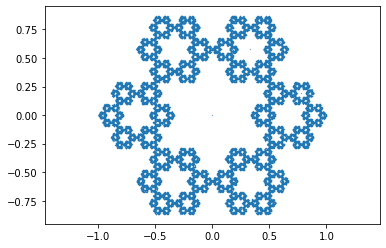

In [16]:
plt.plot(x_list,y_list,'.',markersize=0.5)
plt.axis('equal')

In [17]:
def chaos_game_upgraded(n_poly,p,num_step,center=False, edge=False, rstr_rule=False):
    '''
    an upgraded version to include the option to add midpoint of the edge or centers
    and the option to apply the restriction
    '''
    def restriction(rd):
        '''
        a function determines if rd is accepted
        '''
        if rd==rd_list[-1]: #rd_list is a list record all the past selections
            return False #not accepted
        else:
            return True #accepted
    
    vertex=np.zeros((n_poly,2))
    angle =np.array(range(n_poly))*2*np.pi/n_poly
    vertex[:,0]=np.cos(angle)
    vertex[:,1]=np.sin(angle)
    
    num_vertex=n_poly
    
    center_point=np.zeros((1,2))
    
    edge_point = (vertex + np.roll(vertex,1,axis=0))/2
    
    
    if center:
        vertex=np.vstack((vertex,center_point))
        num_vertex=num_vertex+1
    if edge:
        vertex=np.vstack((vertex,edge_point))
        num_vertex=num_vertex+n_poly
    
    r=np.array([0.4,0])
    x_list=[0]
    y_list=[0]
    rd_list=[-1] #a list record the history of selections,contains a negative number first,so the first step does not produce an error
    for i in range(num_step):
        rd = random.randint(0,num_vertex-1)
        if rstr_rule and restriction(rd)==False:
            continue
        else:
            rd_list.append(rd)
        r = p*r + (1-p)*vertex[rd]
        x_list.append(r[0])
        y_list.append(r[1])
    return x_list, y_list
        
        

In [37]:
x_list,y_list=chaos_game_upgraded(4,3/8,100000,center=True, edge=True,rstr_rule=True)

(-0.9474161448145436,
 0.9486760185121995,
 -0.9472224385983052,
 0.9463293968777601)

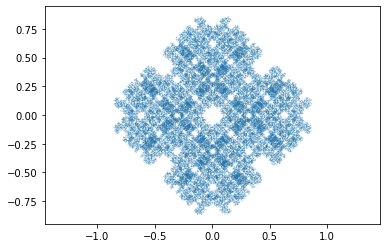

In [38]:
plt.plot(x_list,y_list,'.',markersize=0.1)
plt.axis('equal')